# Evaluation Metrics # 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import pickle

In [3]:
with open('data_for_5/houses_prepared_encoded.pkl', 'rb') as f:
    houses_train_encoded = pickle.load(f)
    houses_test_encoded = pickle.load(f)

houses_test_encoded.head() 

,Order,PID,Lot_Frontage,Lot_Area,Lot_Shape,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,...,Sale_Type_New,Sale_Type_Other,Sale_Type_WD,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Other,Sale_Condition_Partial,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl
0,1,526301100,141,31770,1.0,0.0,4.0,5.0,1960,1960,...,0,0,1,0,1,0,0,0,0,1
1,2,526350040,80,11622,0.0,0.0,5.0,4.0,1961,1961,...,0,0,1,0,1,0,0,0,0,1
2,3,526351010,81,14267,1.0,0.0,4.0,4.0,1958,1958,...,0,0,1,0,1,0,0,0,0,1
3,4,526353030,93,11160,0.0,0.0,3.0,5.0,1968,1968,...,0,0,1,0,1,0,0,0,0,1
4,5,527105010,74,13830,1.0,0.0,5.0,5.0,1997,1998,...,0,0,1,0,1,0,0,0,0,1


In [11]:
# lets estimate a linear regression model to predict the price of the houses
# using all the features in the dataset and the common approach applied in sci-kit learn

# lets start by defining the features and the target variable

X = houses_train_encoded.drop(['Sale_Price', 'Order', 'PID'], axis = 1)
y = houses_train_encoded['Sale_Price']

# lets define the model
houses_model1 = LinearRegression()

# lets fit the model
houses_model1.fit(X, y)

LinearRegression()

In [19]:
# lets use the model to predict the price of the houses in the same dataset

y_pred = houses_model1.predict(houses_train_encoded.drop(['Sale_Price', 'Order', 'PID'],
                                                          axis = 1))

rmse = np.sqrt(mean_squared_error(houses_train_encoded['Sale_Price'], y_pred))

mae = mean_absolute_error(houses_train_encoded['Sale_Price'], y_pred)

medae = median_absolute_error(houses_train_encoded['Sale_Price'], y_pred)

print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('Median Absolute Error:', medae)

Mean Absolute Error: 17112.735024371534
Root Mean Squared Error: 27548.01669321027
Median Absolute Error: 11949.157615486998


In [23]:
# But we wish to have more metrics to evaluate the model
# and a single function that returns them all as a dictionary

def regression_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    return {'RMSE': rmse, 'MAE': mae, 'MedAE': medae, 'MAPE': mape, 'R2': r2}

In [25]:
# X = houses_train_encoded.drop(['Sale_Price', 'Order', 'PID'], axis = 1)
# y = houses_train_encoded['Sale_Price']
# houses_model1 = LinearRegression()
# houses_model1.fit(X, y)

regression_metrics(y, houses_model1.predict(X))

{'RMSE': 27548.01669321027,
 'MAE': 17112.735024371534,
 'MedAE': 11949.157615486998,
 'MAPE': 9.932225949902959,
 'R2': 0.8825600985077463}

# Assessment of the binary classification

In [31]:
churn_train_encoded = pd.read_pickle('data_for_5/churn_train_encoded.pkl')
churn_test_encoded = pd.read_pickle('data_for_5/churn_test_encoded.pkl')

churn_train_encoded.head()

,customer_id,customer_age,customer_number_of_dependents,customer_education,customer_salary_range,customer_relationship_length,customer_available_credit_limit,total_products,period_inactive,contacts_in_last_year,...,average_utilization,customer_gender_M,customer_gender_Unknown,customer_civil_status_Married,customer_civil_status_Single,customer_civil_status_Unknown,credit_card_classification_Gold,credit_card_classification_Platinum,credit_card_classification_Silver,account_status_1
4694,799562,50.0,2.0,2.0,1.0,37.0,13384.0,1.0,3.0,2.0,...,0.000,0,0,1,0,0,0,0,1,0
1263,282706,52.0,1.0,2.0,5.0,36.0,31945.0,4.0,3.0,5.0,...,0.050,1,0,0,0,0,0,0,0,0
4427,837683,46.0,3.0,1.0,3.0,36.0,5489.0,5.0,1.0,2.0,...,0.217,1,0,0,1,0,0,0,0,0
8746,384742,53.0,5.0,0.0,4.0,48.0,9517.0,6.0,1.0,0.0,...,0.196,1,0,1,0,0,0,0,0,0
4386,618362,59.0,0.0,4.0,2.0,53.0,4241.0,3.0,2.0,3.0,...,0.000,1,0,1,0,0,0,0,0,0


In [33]:
# lets estimate a logistic regression model to predict the churn of the customers
# using all the features in the dataset and the common approach applied in sci-kit learn

# omit also CUSTOMER ID !!!!!
X = churn_train_encoded.drop(['account_status_1', 'customer_id'], axis=1) 

y = churn_train_encoded['account_status_1']

# lets define the model
churn_model1 = LogisticRegression(penalty = None, # No regularization
                             max_iter = 5000, # number of iterations, default = 100
                             tol = 1e-2) # Tolerance for stopping criteria, default=1e-4


churn_model1.fit(X, y)

LogisticRegression(max_iter=5000, penalty=None, tol=0.01)

In [35]:
# lets see how to predict probabilities of account_status=closed (1) for the train dataset
# the method .predict_proba() returns the probabilities for each class

churn_model1.predict_proba(churn_train_encoded.drop(
    ['account_status_1', 'customer_id'], axis=1
))

# the first column includes predictions for level 0 and the second column for level 1

array([[0.83412663, 0.16587337],
       [0.80516067, 0.19483933],
       [0.95698578, 0.04301422],
       ...,
       [0.24841416, 0.75158584],
       [0.71073281, 0.28926719],
       [0.98567436, 0.01432564]])

In [45]:
# how to extract predicted probabilities of account_status = closed (1)?
y_pred_probs = churn_model1.predict_proba(churn_train_encoded.drop(
    ['account_status_1', 'customer_id'], axis = 1
))[:, 1]  # to extract column 1 which is level 1 from predictions


# if one just wants to predict the class (for default cutoff = 0.5), 
# one can use the method .predict()
y_pred = churn_model1.predict(churn_train_encoded.drop(
    ['account_status_1', 'customer_id'], axis = 1
))


# calculate the confussion matrix
cm = confusion_matrix(churn_train_encoded['account_status_1'], y_pred)


# calculate the false positive rate and the true positive rate
fpr, tpr, _ = roc_curve(churn_train_encoded['account_status_1'], y_pred_probs)
# y_true: True binary labels
# y_score: Target scores - probability estimates of the positive class


# calculate the area under the curve
roc_auc = auc(fpr, tpr)

print('Confusion Matrix:')
print(cm)

print('Area Under the Curve:', roc_auc)

Confusion Matrix:
[[5774  175]
 [ 603  536]]
Area Under the Curve: 0.883513227963


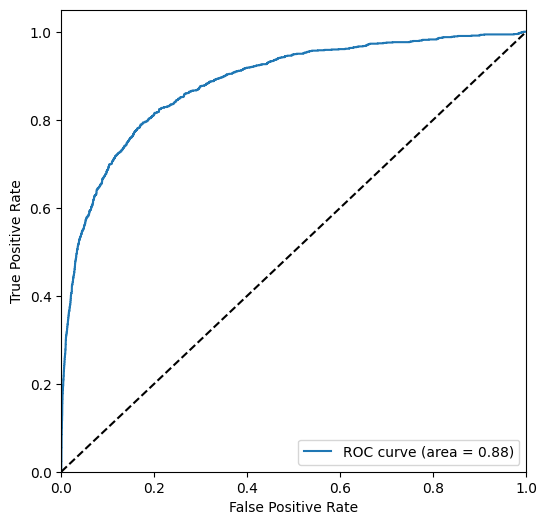

In [48]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [50]:
print(classification_report(churn_train_encoded['account_status_1'], y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5949
           1       0.75      0.47      0.58      1139

    accuracy                           0.89      7088
   macro avg       0.83      0.72      0.76      7088
weighted avg       0.88      0.89      0.88      7088



In [52]:
# we will write a function that calculates various metrics for the classification model,
# allows to define a custom threshold for the predicted probabilities
# and stores the results in a dictionary

def classification_metrics(y_true, y_pred_prob, cutoff = 0.5):
    y_pred = (y_pred_prob > cutoff).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    accuracy = (cm[0,0] + cm[1,1]) / np.sum(cm)
    precision_1 = cm[1,1] / (cm[1,1] + cm[0,1])
    precision_0 = cm[0,0] / (cm[0,0] + cm[1,0])
    recall_1 = cm[1,1] / (cm[1,1] + cm[1,0])
    recall_0 = cm[0,0] / (cm[0,0] + cm[0,1])
    f1_score_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1)
    f1_score_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0)
    # averages of the metrics for both classes
    balanced_accuracy = (recall_0 + recall_1) / 2
    balanced_precision = (precision_0 + precision_1)/2
    balanced_f1 = (f1_score_0 + f1_score_1) / 2

    return {'AUROC': roc_auc, 'Accuracy': accuracy, 'Precision 1': precision_1,
            'Precision 0': precision_0, 'Recall 1': recall_1, 'Recall 0': recall_0,
            'F1 Score 1': f1_score_1, 'F1 Score 0': f1_score_0, 'Balanced Accuracy': balanced_accuracy,
            'Balanced precision': balanced_precision, 'Balanced F1': balanced_f1}

In [54]:
classification_metrics(y, churn_model1.predict_proba(X)[:, 1])

# recall for 1 is just 0.47
# lets try to change the threshold for the predicted probabilities

{'AUROC': 0.883513227963,
 'Accuracy': 0.8902370203160271,
 'Precision 1': 0.7538677918424754,
 'Precision 0': 0.905441430139564,
 'Recall 1': 0.47058823529411764,
 'Recall 0': 0.9705832913094637,
 'F1 Score 1': 0.5794594594594595,
 'F1 Score 0': 0.9368813889339607,
 'Balanced Accuracy': 0.7205857633017907,
 'Balanced precision': 0.8296546109910197,
 'Balanced F1': 0.7581704241967101}

In [56]:
# try the threshold 0.16
classification_metrics(y, churn_model1.predict_proba(X)[:, 1], 0.16)

{'AUROC': 0.883513227963,
 'Accuracy': 0.8020598194130926,
 'Precision 1': 0.4375,
 'Precision 0': 0.9567926045016077,
 'Recall 1': 0.8112379280070237,
 'Recall 0': 0.800302571860817,
 'F1 Score 1': 0.5684404798523531,
 'F1 Score 0': 0.8715789473684211,
 'Balanced Accuracy': 0.8057702499339203,
 'Balanced precision': 0.6971463022508039,
 'Balanced F1': 0.7200097136103871}

In [58]:
# lets check how all these metrics change with the theshold
# and combine them into a dataframe
thresholds = np.arange(0, 1, 0.05)

# now we will calculate the metrics for each threshold
for t in thresholds:
    metrics = classification_metrics(y, churn_model1.predict_proba(X)[:,1], t)

    # Lets add the current result to the results dataframe
    # adding t as the first column
    if t == 0:
        results = pd.DataFrame(metrics, index=[t])
    else:
        results.loc[t] = metrics

C:\Users\khali\AppData\Local\Temp\ipykernel_14644\3697927685.py:12: RuntimeWarning: invalid value encountered in scalar divide
  precision_0 = cm[0,0] / (cm[0,0] + cm[1,0])


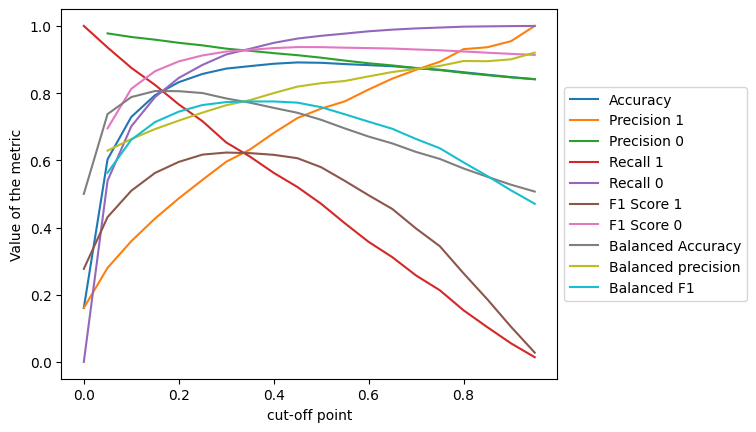

In [62]:
# plot the results showing how the metrics change with the threshold
# skip AUC as it is not affected by the threshold
results.drop('AUROC', axis=1).plot()
# put the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor = (1, 0.5))
plt.xlabel('cut-off point')
plt.ylabel('Value of the metric')
plt.show()

# Assessment of multilevel classification

In [69]:
cards_train = pd.read_pickle('data_for_5/cards_train.pkl')
cards_test = pd.read_pickle('data_for_5/cards_test.pkl')

cards_test.head()

,credit_limit,n_contracts,utilization,status,gender
5484,24840,53,91.2,1,K
2126,1605,8,100.0,2,K
4683,26420,50,62.3,1,K
4065,6530,24,26.1,0,K
64,5070,16,39.4,0,K


In [71]:
# we need to encode the categorical variable: gender into dummy variables

cards_train_encoded = pd.get_dummies(cards_train, 
                                     columns = ['gender'],
                                     drop_first = True,
                                     dtype = int
                                    )

cards_test_encoded = pd.get_dummies(cards_test,
                                    columns = ['gender'],
                                    drop_first = True,
                                    dtype = int
                                   )

In [73]:
# estimate a logistic regression model to predict the status of the cards
# using all the features in the dataset and the common approach applied in sci-kit learn

cards_train_X = cards_train_encoded.drop('status', axis=1)
cards_train_y = cards_train_encoded['status']

cards_model1 = LogisticRegression(multi_class = 'multinomial', # multi-class classification
                                  penalty = None,  # No regularization
                                  max_iter = 5000,
                                  tol = 0.01
                                 )

cards_model1.fit(cards_train_X, cards_train_y)

C:\Users\khali\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=5000, multi_class='multinomial', penalty=None,
                   tol=0.01)

In [77]:
# predict the status of the cards in the train dataset

cards_fitted = cards_model1.predict(cards_train_encoded.drop('status', axis=1))

# check the frequency of the predicted values
cards_fitted_series = pd.Series(cards_fitted)
print(cards_fitted_series.value_counts())

# the most commonly predicted value is 0 (status = Open)

0    3205
1     903
2     862
Name: count, dtype: int64


In [81]:
# let's see the comparison of actual and fitted values
# (equivalent to classification table)

conf_matrix = confusion_matrix(cards_train['status'], cards_fitted)

# convert to DataFrame for readability
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index = [f'Actual {i}' for i in cards_train['status'].unique()],
    columns = [f'Predicted {i}' for i in cards_train['status'].unique()]
)

print(conf_matrix_df)

          Predicted 0  Predicted 1  Predicted 2
Actual 0         2667          101           54
Actual 1          291          774           25
Actual 2          247           28          783


In [83]:
# we can also see a detailed classification report
# similarly to binary classification, but for each class separately

cards_train_report = classification_report(cards_train['status'], cards_fitted)

print(cards_train_report)

# status 0 predicted correctly in 95% of cases - the remaining slightly worse (recall)
# precision highest for level 2 (C) - most observations predicted as
# this level actually have problems with paying off credit card debts

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      2822
           1       0.86      0.71      0.78      1090
           2       0.91      0.74      0.82      1058

    accuracy                           0.85      4970
   macro avg       0.87      0.80      0.83      4970
weighted avg       0.85      0.85      0.85      4970



In [85]:
# how to calculate the predicted probabilities of individual levels?
# just use the .predict_proba() method

# let's show an example on a training sample

cards_fitted_probs = cards_model1.predict_proba(
    cards_train_encoded.drop('status', axis=1)
)

# convert the resulting numpy array to a DataFrame for readability
cards_fitted_probs_df = pd.DataFrame(cards_fitted_probs)

cards_fitted_probs_df.head()

# generally the final predicted value is the one with the highest individual probability
# but this will not always be easy and conclusive

,0,1,2
0,0.810114,0.081982,0.107903
1,0.841937,0.125063,0.033000
2,0.800642,0.146920,0.052438
3,0.829742,0.156939,0.013318
4,0.798102,0.092441,0.109457


# Model Validation # 6

In [91]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, balanced_accuracy_score
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [93]:
# lets generate some random data with two variables: x and y,
# which are related by a cubic function + epsilon
# and epsilon is a random noise N(0,10)

np.random.seed(123)
epsilon = np.random.normal(0, 10, 200)

x = np.random.uniform(-3, 3, 200)
y = x**3 + 4*x**2 -3*x + 4 + epsilon

# put them into a dataframe
data1 = pd.DataFrame({'x': x, 'y': y})

data1.head()

,x,y
0,-1.570501,3.847488
1,1.846747,28.373384
2,2.369870,35.495164
3,-2.740663,6.618216
4,-1.188319,5.749335


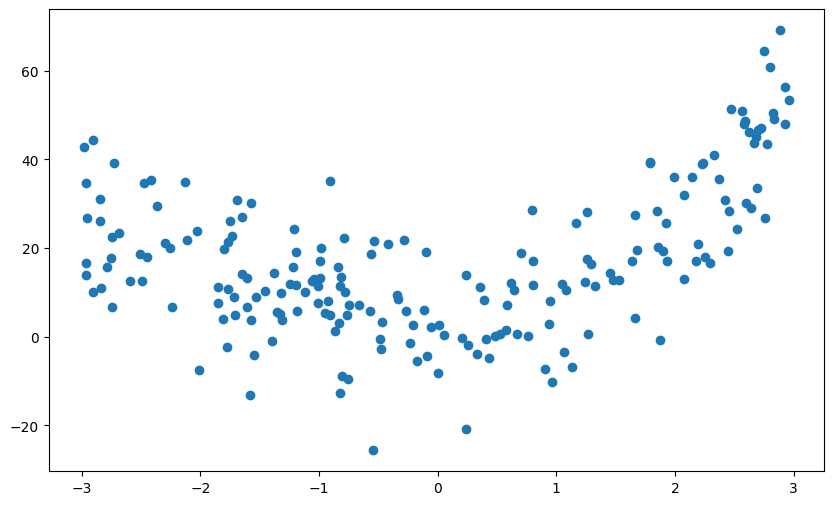

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(data1['x'], data1['y'])

15.496969323356865


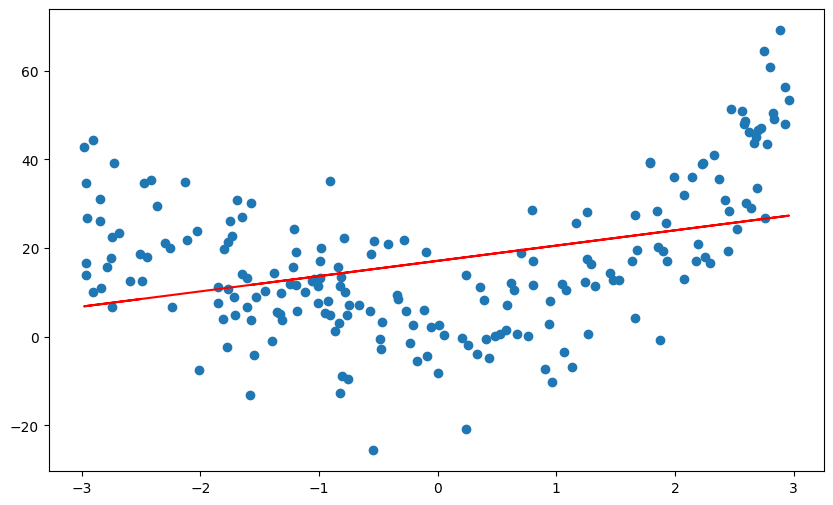

In [129]:
# and try to fit a linear regression model to this data

# create a Linear Regression model
model1 = LinearRegression()

# fit the model
model1.fit(data1[['x']], data1[['y']])

# make predictions
y_pred = model1.predict(data1[['x']])

# plot the data and the model
plt.figure(figsize=(10, 6))
plt.scatter(data1['x'], data1['y'])
plt.plot(data1['x'], y_pred, color = 'red')

# and assess the RMSE of the model
rmse = np.sqrt(mean_squared_error(data1['y'], y_pred))
print(rmse)

In [119]:
# lets assume the test data has the same distribution as the training data
# but with the opposite sign of the noise

y_test = x**3 + 4*x**2 - 3*x + 4 - epsilon

# put them into a DataFrame
data1_test = pd.DataFrame({'x':x, 'y':y_test})

## Polynomial Regression
Polynomial regression helps model non-linear relationships by adding powered terms of features.

In [125]:
# now we will estimate polynomial regression models of different degrees from 1 to 30
# and compare their RMSE both on the training and test data

degrees = np.arange(1, 31)

# create a list to store results (more efficient than appending to DataFrame in loop)
results_list = []

for degree in degrees:
    # create a polynomial regression model
    model = np.polyfit(data1['x'], data1['y'], degree)

    # make predictions - the values of x are the same for both training and test data
    y_pred = np.polyval(model, data1['x'])

    rmse_train = np.sqrt(mean_squared_error(data1['y'], y_pred))
    rmse_test = np.sqrt(mean_squared_error(data1_test['y'], y_pred))

    # append results as a dictionary
    results_list.append(
        {'degree': degree,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test}
    ) 

# convert the list to a DataFrame after the loop (efficient)
results = pd.DataFrame(results_list)

results.tail()

,degree,rmse_train,rmse_test
25,26,9.930563,12.131000
26,27,9.926652,12.140600
27,28,9.876622,12.262400
28,29,9.861619,12.298571
29,30,9.859016,12.304829


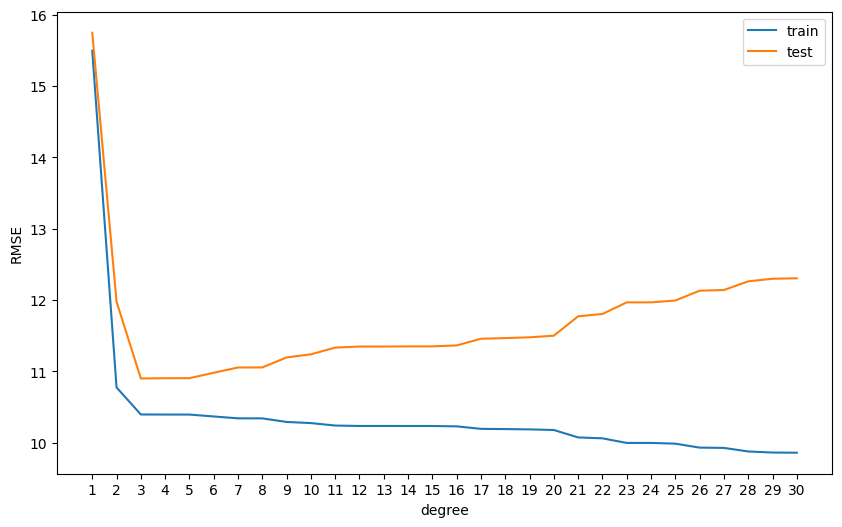

In [137]:
plt.figure(figsize=(10, 6))
plt.plot(results['degree'], results['rmse_train'], label = 'train')
plt.plot(results['degree'], results['rmse_test'], label = 'test')
plt.xticks(results['degree'])
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.legend()

# clear overfitting for large degrees

In [143]:
# lets use 5-fold cross-validation to find the optimal degree for the polynomial
# regression model

# create a k-fold object
cv5 = KFold(n_splits = 5, 
            shuffle = True,
            random_state = 123)

In [147]:
# for hyperparameter tuning we will use grid search,
# i.e define a particular grid (list ov values) of parameters

# it is a bit more tricky to use GridSearchCV() function
# with a polynomial regression - np.polyfit() does not work
# with GridSearchCV()

# we need to use PolynomialFeatures() transformer from sklearn.preprocessing
# - it generates polynomial and interaction features for ALL features in the dataset

#  lets see how it works

poly = PolynomialFeatures(
    degree = 4, # Generates x, x^2, x^3, x^4 for each feature
    interaction_only = False, # No interaction terms ()
    include_bias = False # removes the constant (intercept) column
)

X_poly = poly.fit_transform(data1[['x']])

# lets see the first 5 rows of the transformed data
print(X_poly[:5])

# compare with the original data
print(data1[['x']].head())

[[ -1.57050057   2.46647203  -3.87359571   6.08348426]
 [  1.84674652   3.4104727    6.29827858  11.63132404]
 [  2.36986973   5.61628252  13.30985793  31.54262939]
 [ -2.74066265   7.51123175 -20.58575229  56.41860236]
 [ -1.18831898   1.412102    -1.67802762   1.99403207]]
          x
0 -1.570501
1  1.846747
2  2.369870
3 -2.740663
4 -1.188319


We will use it in a **pipeline** with a `LinearRegression()` function

* **Pipelines** in scikit-learn streamline machine learning workflows by **chaining preprocessing steps and models into a single sequence**.

* This ensures that transformations (e.g., scaling, encoding, polynomial feature generation) and model fitting occur **consistently during training and prediction**

* Pipelines improve code readability, reproducibility, and **prevent data leakage** by **ensuring transformations are applied only on training data** before model evaluation

### GridSearchCV - for hyperparameters

In [157]:
# lets create a pipeline with two steps

poly_pipeline = Pipeline([
    ('generator', PolynomialFeatures()), # generate polynomial features
    ('model', LinearRegression()) # apply the model
])

# we need to define a grid of hyperparameters for the PolynomialFeatures() transformer
# it has to be a dictionary with the name of the step and the name of the hyperparameter
# as defined in the pipeline and algorithm documentation

# i.e. here we use the name "generator__degree" because
# our pipeline step is named "generator" and the hyperparameter of the 
# PolynomialFeatures() transformer is named "degree"

polyreg_grid = {'generator__degree': degrees}

# finally we define a GridSearchCV object to find the optimal degree

poly_grid_search = GridSearchCV(
    poly_pipeline, # model or pipeline to tune
    param_grid = polyreg_grid, # dictionary with hyperparameters
    cv = cv5, # cross-validation strategy
    # python assumes the higher the better,
    # that is why we use negative RMSE
    scoring = 'neg_root_mean_squared_error', # evaluation metric
    # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    n_jobs = -1 # use all available CPU cores (optional)  
)

In [159]:
# now we treat the defined grid_search object as a regular model

# fit on training data
poly_grid_search.fit(data1.drop(columns = 'y'),
                    data1['y'])

# print or inspect the best parameters and scores
print('Best degree:', poly_grid_search.best_params_)
print('Best -RMSE:', poly_grid_search.best_score_)

# the result is in line with expectations

Best degree: {'generator__degree': 3}
Best -RMSE: -10.54448880089488


In [161]:
# let's see what the results were for each degree value

# GridSearch result contains an element called cv_results_

# convert results to a DataFrame
poly_grid_search_df = pd.DataFrame(poly_grid_search.cv_results_)
poly_grid_search_df.head()


# Column Description
# param_*         Hyperparameter values ​​being tested
# mean_test_score Average score for a given set of hyperparameters
# std_test_score  Standard deviation of cross-validation results
# rank_test_score Rank of the hyperparameter set (1 = best)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_generator__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.075502,0.000000,0.004536,0.000000,1,{'generator__degree': 1},-15.394207,-15.812077,-17.826860,-13.957795,-15.626581,-15.723504,1.238346,30
1,0.047985,0.034657,0.004059,0.000971,2,{'generator__degree': 2},-11.257249,-9.243452,-12.457009,-10.790088,-10.772356,-10.904031,1.031925,7
2,0.006271,0.000663,0.002887,0.000790,3,{'generator__degree': 3},-11.489866,-8.574091,-12.200429,-10.135614,-10.322444,-10.544489,1.243770,1
3,0.005690,0.001450,0.002744,0.000692,4,{'generator__degree': 4},-11.591405,-8.583457,-12.409769,-10.147530,-10.333090,-10.613050,1.311466,2
4,0.004109,0.000825,0.002889,0.000374,5,{'generator__degree': 5},-11.833596,-8.607393,-12.620034,-10.171256,-10.524485,-10.751353,1.389084,3


<Axes: xlabel='param_generator__degree', ylabel='mean_test_score'>

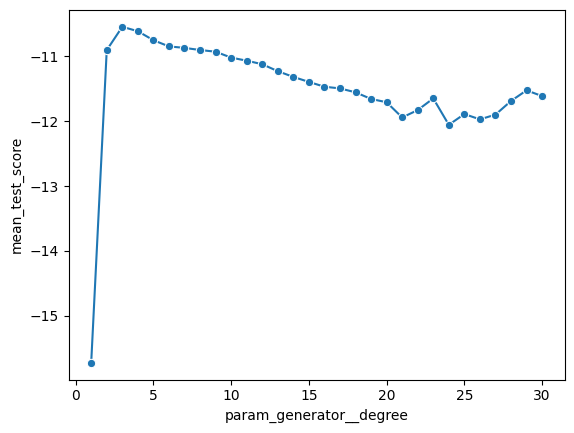

In [179]:
sns.lineplot(
    x = poly_grid_search_df['param_generator__degree'],
    y = poly_grid_search_df['mean_test_score'],
    marker = 'o'
)

In [181]:
# lets apply the repeated cross-validation
# we will use 5-fold cross-validation repeated 3 times

# create a repeated k-fold object

cv5x3 = RepeatedKFold(n_splits = 5, # Number of folds
                      n_repeats = 3, # Number of repetitions
                      random_state = 123)

poly_grid_search2 = GridSearchCV(poly_pipeline, # same model as before
                                 param_grid = polyreg_grid, # same grid as before
                                 cv = cv5x3, # DIFFERENCE: repeated cross-validation
                                 scoring = 'r2', # DIFFERENCE: R^2 metric
                                 # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                                 n_jobs = -1)  # Use all available CPU cores (optional)

# Fit on training data
poly_grid_search2.fit(data1.drop(columns = 'y'),
                      data1['y'])

# Print or inspect the best parameters and scores
print("Best degree:", poly_grid_search2.best_params_)
print("Best R2:", poly_grid_search2.best_score_)

Best degree: {'generator__degree': 3}
Best R2: 0.5729739915470716


<Axes: xlabel='param_generator__degree', ylabel='mean_test_score'>

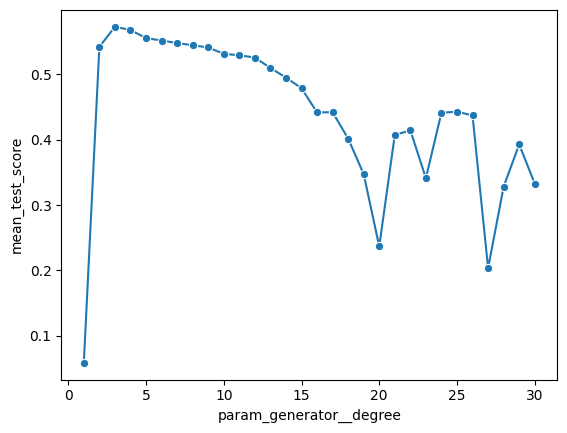

In [183]:
# lets plot the results
poly_grid_search2_df = pd.DataFrame(poly_grid_search2.cv_results_)

sns.lineplot(x = poly_grid_search2_df["param_generator__degree"],
             y = poly_grid_search2_df["mean_test_score"],
             marker = "o")

# very similar shape

### LeaveOneOut - cross-validation for hyperparameters

In [187]:
# and in the end lets use leave-one-out cross-validation paired with the
# randomized search to find the optimal degree

# it does loop NOT over all potential combinations of hyperparameters 
# but randomly selects a subset of them to evaluate

# it is more efficient than GridSearchCV for large hyperparameter spaces
# but does not guarantee to find the optimal hyperparameters - see below

# create a k-fold object
cv_loo = LeaveOneOut()

# create a randomized search object
poly_random_search = RandomizedSearchCV(
            poly_pipeline, # model or pipeline to tune
            # now we define a distribution of hyperparameters
            # instead of a grid (but in fact provide the same object as before)
            param_distributions = polyreg_grid,
            cv = cv_loo, # DIFFERENCE: leave-one-out cross-validation
            n_iter = 10, # number of iterations (selected values)
            scoring = 'neg_mean_absolute_percentage_error', # DIFFERENCE: MAPE metric
            n_jobs = -1
)


# Fit on training data
poly_random_search.fit(data1.drop(columns = 'y'),
                       data1['y'])

# Print or inspect the best parameters and scores
print("Best degree:", poly_random_search.best_params_)
print("Best -MAPE:", poly_random_search.best_score_)

# is the result surprising?

Best degree: {'generator__degree': 11}
Best -MAPE: -1.6895841354395058


In [189]:
# what values of the degree hyperparameter were tested?

poly_random_search_df = pd.DataFrame(poly_random_search.cv_results_)

poly_random_search_df['param_generator__degree'].tolist()

# they do not include the optimal value of 3

[21, 19, 26, 28, 18, 29, 13, 11, 14, 24]

## Using cross-validation to assess predictive performance on new data

In [192]:
# Lets load the churn dataset AFTER encoding categorical preditors
# from a pickle file

churn_train_encoded = pd.read_pickle('data_for_6/churn_train_encoded.pkl')
churn_test_encoded = pd.read_pickle('data_for_6/churn_test_encoded.pkl')

churn_train_encoded.head()

,customer_id,customer_age,customer_number_of_dependents,customer_education,customer_salary_range,customer_relationship_length,customer_available_credit_limit,total_products,period_inactive,contacts_in_last_year,...,average_utilization,customer_gender_M,customer_gender_Unknown,customer_civil_status_Married,customer_civil_status_Single,customer_civil_status_Unknown,credit_card_classification_Gold,credit_card_classification_Platinum,credit_card_classification_Silver,account_status_1
4694,799562,50.0,2.0,2.0,1.0,37.0,13384.0,1.0,3.0,2.0,...,0.000,0,0,1,0,0,0,0,1,0
1263,282706,52.0,1.0,2.0,5.0,36.0,31945.0,4.0,3.0,5.0,...,0.050,1,0,0,0,0,0,0,0,0
4427,837683,46.0,3.0,1.0,3.0,36.0,5489.0,5.0,1.0,2.0,...,0.217,1,0,0,1,0,0,0,0,0
8746,384742,53.0,5.0,0.0,4.0,48.0,9517.0,6.0,1.0,0.0,...,0.196,1,0,1,0,0,0,0,0,0
4386,618362,59.0,0.0,4.0,2.0,53.0,4241.0,3.0,2.0,3.0,...,0.000,1,0,1,0,0,0,0,0,0


In [194]:
# using the training data only we will assess the performance of a logistic regression model
# when used to predict the account_status on a new data - not used for model training

# lets start by defining the features and the target variable
X = churn_train_encoded.drop(['account_status_1', 'customer_id'], axis=1)
y = churn_train_encoded['account_status_1']

# create a logistic regression model
churn_model1 = LogisticRegression(penalty = None, # no regularization
                                  max_iter = 10000, # default is 100
                                  tol = 1e-2) # default is 1e-4

In [196]:
# Perform 5-fold cross-validation on the training data
cv5 = KFold(n_splits = 5,
            shuffle = True,
            random_state = 123)

# apply modelling and get the value of the metric
# !!! if we evaluate just one model, we can use cross_val_score() function

scores = cross_val_score(
        churn_model1, # model
        X, # features
        y, # target
        cv = cv5, # above defined 5-fold cross_validation
        scoring = 'balanced_accuracy'
)

print(scores)

# the results include balanced accuracy for each fold

[0.7018345  0.69572191 0.72546669 0.71024607 0.72066047]


In [198]:
# lets calculate the mean of the scores
cv_ba = np.mean(scores)

# and print the results
print("Mean balanced accuracy based on 5-fold CV:", cv_ba)

Mean balanced accuracy based on 5-fold CV: 0.7107859275772979


In [200]:
# lets fit the model on the whole training data
churn_model1.fit(X, y)

# make predictions on the test data
y_pred = churn_model1.predict(churn_test_encoded.drop(['account_status_1', 'customer_id'], axis=1))

# calculate the balanced accuracy
ba = balanced_accuracy_score(churn_test_encoded['account_status_1'], y_pred)

print("Balanced accuracy on the test data:", ba)

# was the CV result a good predictor of the test result?

Balanced accuracy on the test data: 0.6972562993618703


In [202]:
'''
Balanced accuracy is the average of recall for each class — useful for imbalanced data.

Score of 0.697 means the model is correct ~69.7% across all classes.
'''

'\nBalanced accuracy is the average of recall for each class — useful for imbalanced data.\n\nScore of 0.697 means the model is correct ~69.7% across all classes.\n'